<a href="https://colab.research.google.com/github/monica0023/monica0023/blob/main/churn_prediction_project1_code_clause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHURN PREDICTION IN TELECOM INDUSTRY USING LOGISTIC REGRESSION**


In [21]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("/churn-tele dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**EDA-EXPLORATORY DATA ANALYSIS**

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.dropna(inplace=True)


In [24]:
df_1=df.drop_duplicates()


In [25]:
df_1.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

**HANDLING OBJECT DATA**

In [26]:
df_1.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [27]:
df_1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
print (df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


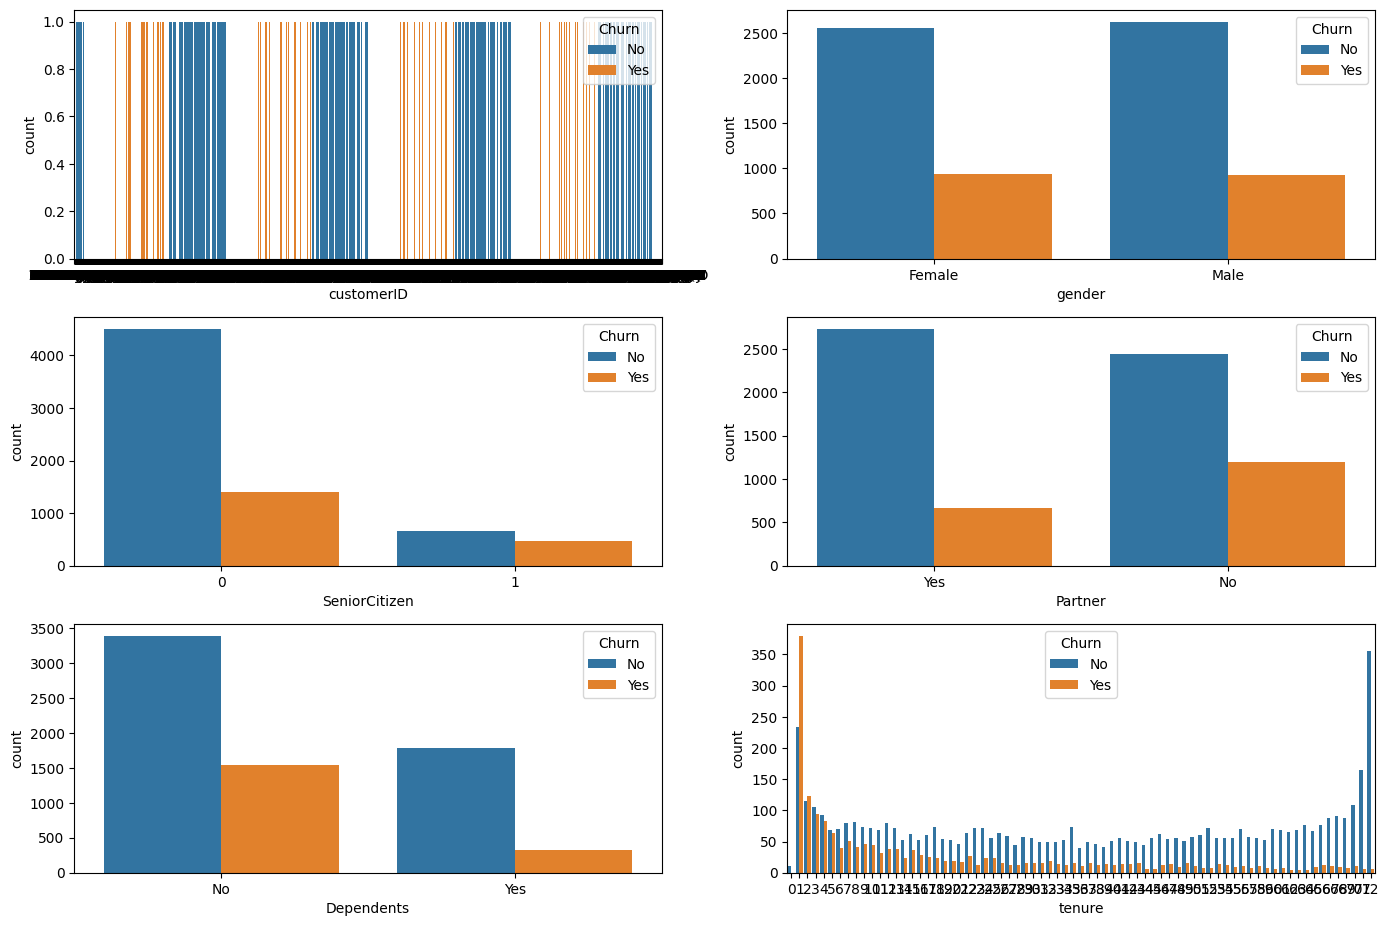

In [29]:
x_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
          'tenure']

# Features (x)
x = df[x_cols]

# Target variable (y)
y = df['Churn']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))

# Using a 4x2 grid
for i, col in enumerate(x_cols, 1):
    plt.subplot(4, 2, i)  # Adjusted to a 4x2 grid
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [30]:

df['Churn'].replace(['No','Yes'],[0,1],inplace=True)
#Let's convert all the categorical variables into dummy variables
data_dummies=pd.get_dummies(df)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
x = data_dummies.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable, and you want to keep all other columns
y = data_dummies['Churn']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
acc = accuracy_score(y_test, predictions)
classif = classification_report(y_test, predictions)
confus = confusion_matrix(y_test, predictions)

# Print the results
print(f'Accuracy: {acc}')
print(f'Classification Report:\n{classif}')
print(f'Confusion Matrix:\n{confus}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8090844570617459
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[928 108]
 [161 212]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.01,0.1,1],
            'penalty':['l1','l2']
}

grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
print("best paramaters:",best_params)

y_pred=grid_search.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

print(y_pred)
print(conf_matrix)
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=param_grid,n_iter=5,cv=5)
random_search.fit(x_train,y_train)

best_params=random_search.best_params_
print("best paramaters:",best_params)

y_pred=grid_search.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

print(y_pred)
print(conf_matrix)
print(class_report)